## Librerias

In [1]:
import pandas as pd 
import numpy as np
import missingno as msno
import chardet
import pyarrow
import json

In [2]:
# Configurar Pandas para mostrar todas las filas y columnas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Carga y ETL Checkin de Yelp 

In [3]:
def cargar_datos(nombre_archivo):
    data = []
    with open(nombre_archivo, "rb") as file:
        result = chardet.detect(file.read())
    encoding = result['encoding']
    with open(nombre_archivo, "r", encoding=encoding) as file:
        for line in file:
            data.append(json.loads(line))
    return pd.DataFrame(data)


In [4]:
# Cargar datos del archivo "checkin.json" en un DataFrame
df_checkin_yelp = cargar_datos("Yelp/checkin.json")

In [5]:
# Cargar datos del archivo "tip.json" en otro DataFrame
df_tip_yelp = cargar_datos("Yelp/tip.json")

In [80]:
# Ruta al archivo .pkl
archivo_pkl = "Yelp/business.pkl"

# Lee el archivo .pkl en un DataFrame
df_business_yelp = pd.read_pickle(archivo_pkl)

In [7]:
df_checkin_yelp.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [8]:
df_checkin_yelp.shape

(131930, 2)

In [9]:
# Chequeo valores nulos
df_checkin_yelp.isnull().sum()

business_id    0
date           0
dtype: int64

In [10]:
# Chequeo df
df_checkin_yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [11]:
# Chequeo valores duplicados
df_checkin_yelp.duplicated().sum()

0

In [13]:
# Genero una funcion para dividir las fechas
desanidar = []

for _, row in df_checkin_yelp.iterrows():
    business_id = row['business_id']
    dates = row['date'].split(', ')
    for date in dates:
        time, date = date.split(' ')
        desanidar.append([business_id, time, date])

df_desa_checkin_yelp = pd.DataFrame(desanidar, columns=['business_id', 'date', 'hour'])

In [14]:
# Chequeo como quedo el df desanidado
df_desa_checkin_yelp.head(15)

,business_id,date,hour
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13,21:10:56
1,---kPU91CF4Lq2-WlRu9Lw,2020-06-02,22:18:06
2,---kPU91CF4Lq2-WlRu9Lw,2020-07-24,22:42:27
3,---kPU91CF4Lq2-WlRu9Lw,2020-10-24,21:36:13
4,---kPU91CF4Lq2-WlRu9Lw,2020-12-09,21:23:33
5,---kPU91CF4Lq2-WlRu9Lw,2021-01-20,17:34:57
6,---kPU91CF4Lq2-WlRu9Lw,2021-04-30,21:02:03
7,---kPU91CF4Lq2-WlRu9Lw,2021-05-25,21:16:54
8,---kPU91CF4Lq2-WlRu9Lw,2021-08-06,21:08:08
9,---kPU91CF4Lq2-WlRu9Lw,2021-10-02,15:15:42


In [15]:
#Se incrementa de 133 mil aprox a 13 millones aprox
df_desa_checkin_yelp.shape

(13356875, 3)

<AxesSubplot: >

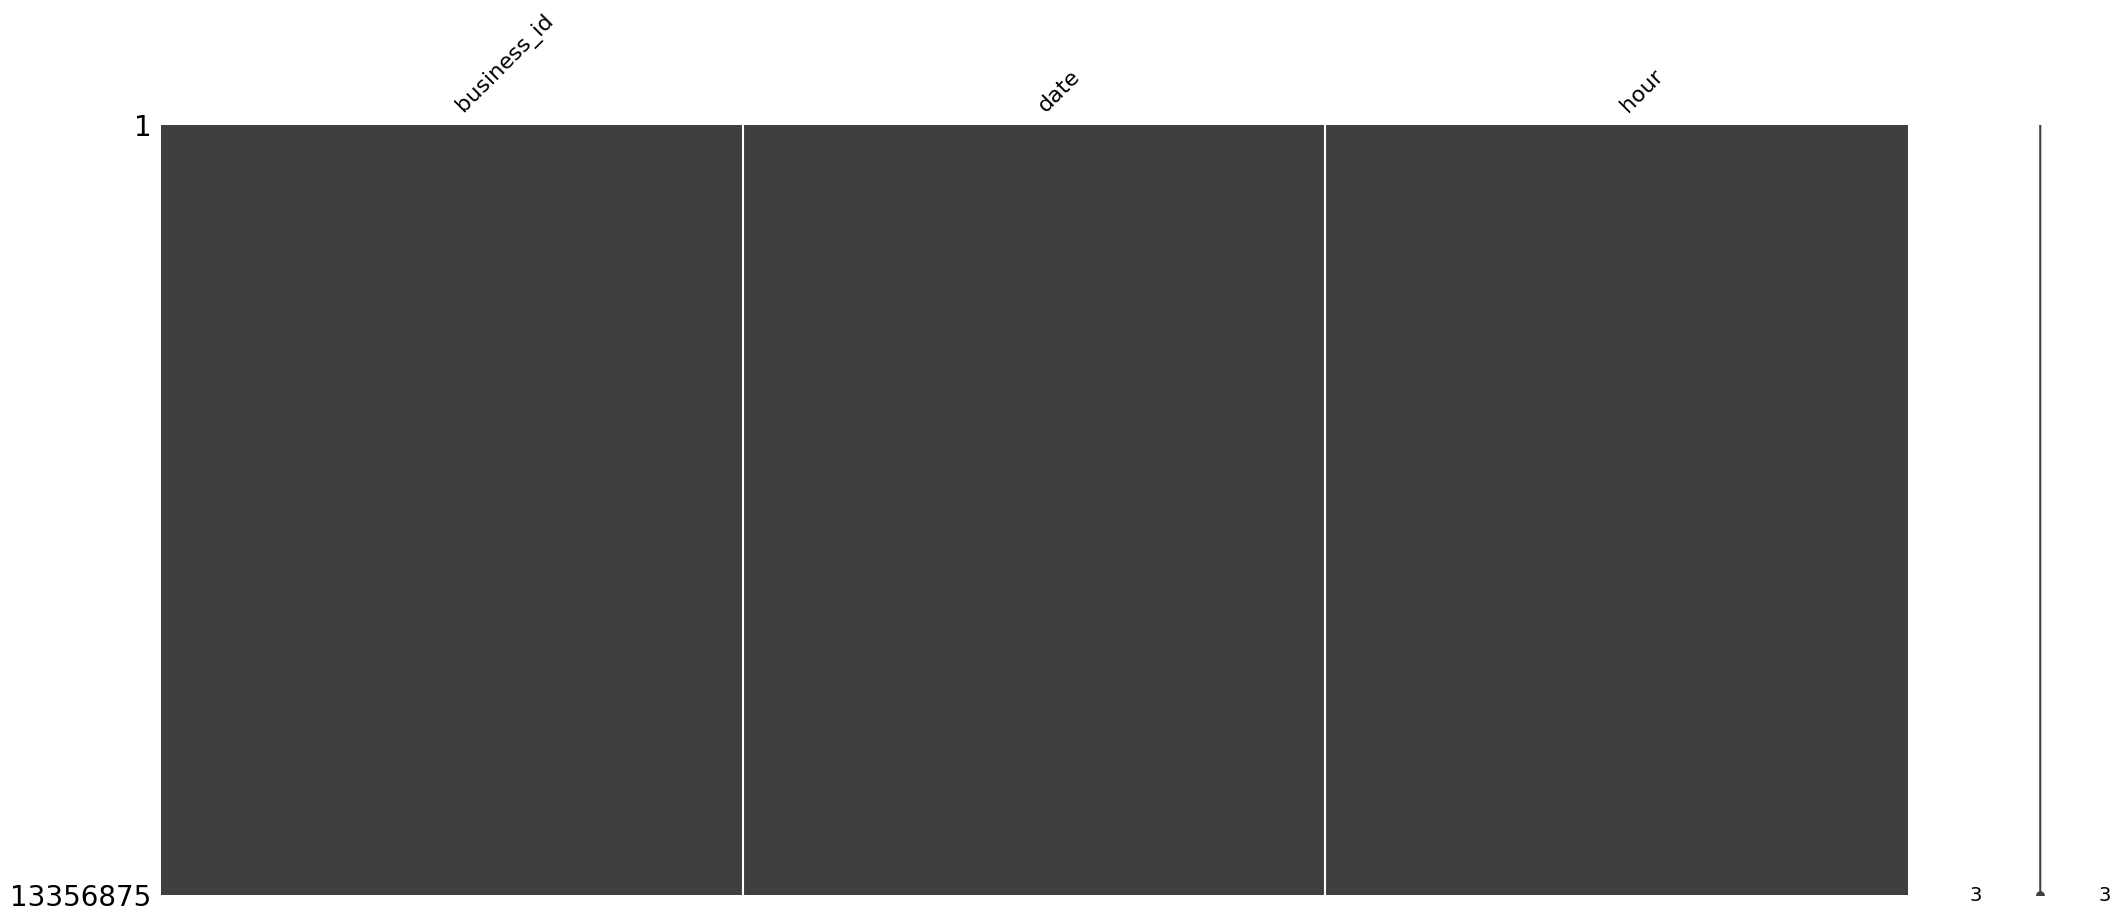

In [16]:
msno.matrix(df_desa_checkin_yelp)

In [17]:
# Exporto df desanidado
df_desa_checkin_yelp.to_parquet('Archivos/df_checkin_yelp.parquet')

## Carga y ETL business de Yelp 

In [81]:
df_business_yelp.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
df_business_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

In [83]:
# Veo los valores nulos 
df_business_yelp.isnull().sum()

business_id          0
name                 0
address              0
city                 0
state                3
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       13744
categories         103
hours            23223
business_id     150341
name            150341
address         150341
city            150341
state           150341
postal_code     150341
latitude        150341
longitude       150341
stars           150341
review_count    150341
is_open         150341
attributes      150341
categories      150341
hours           150341
dtype: int64

<AxesSubplot: >

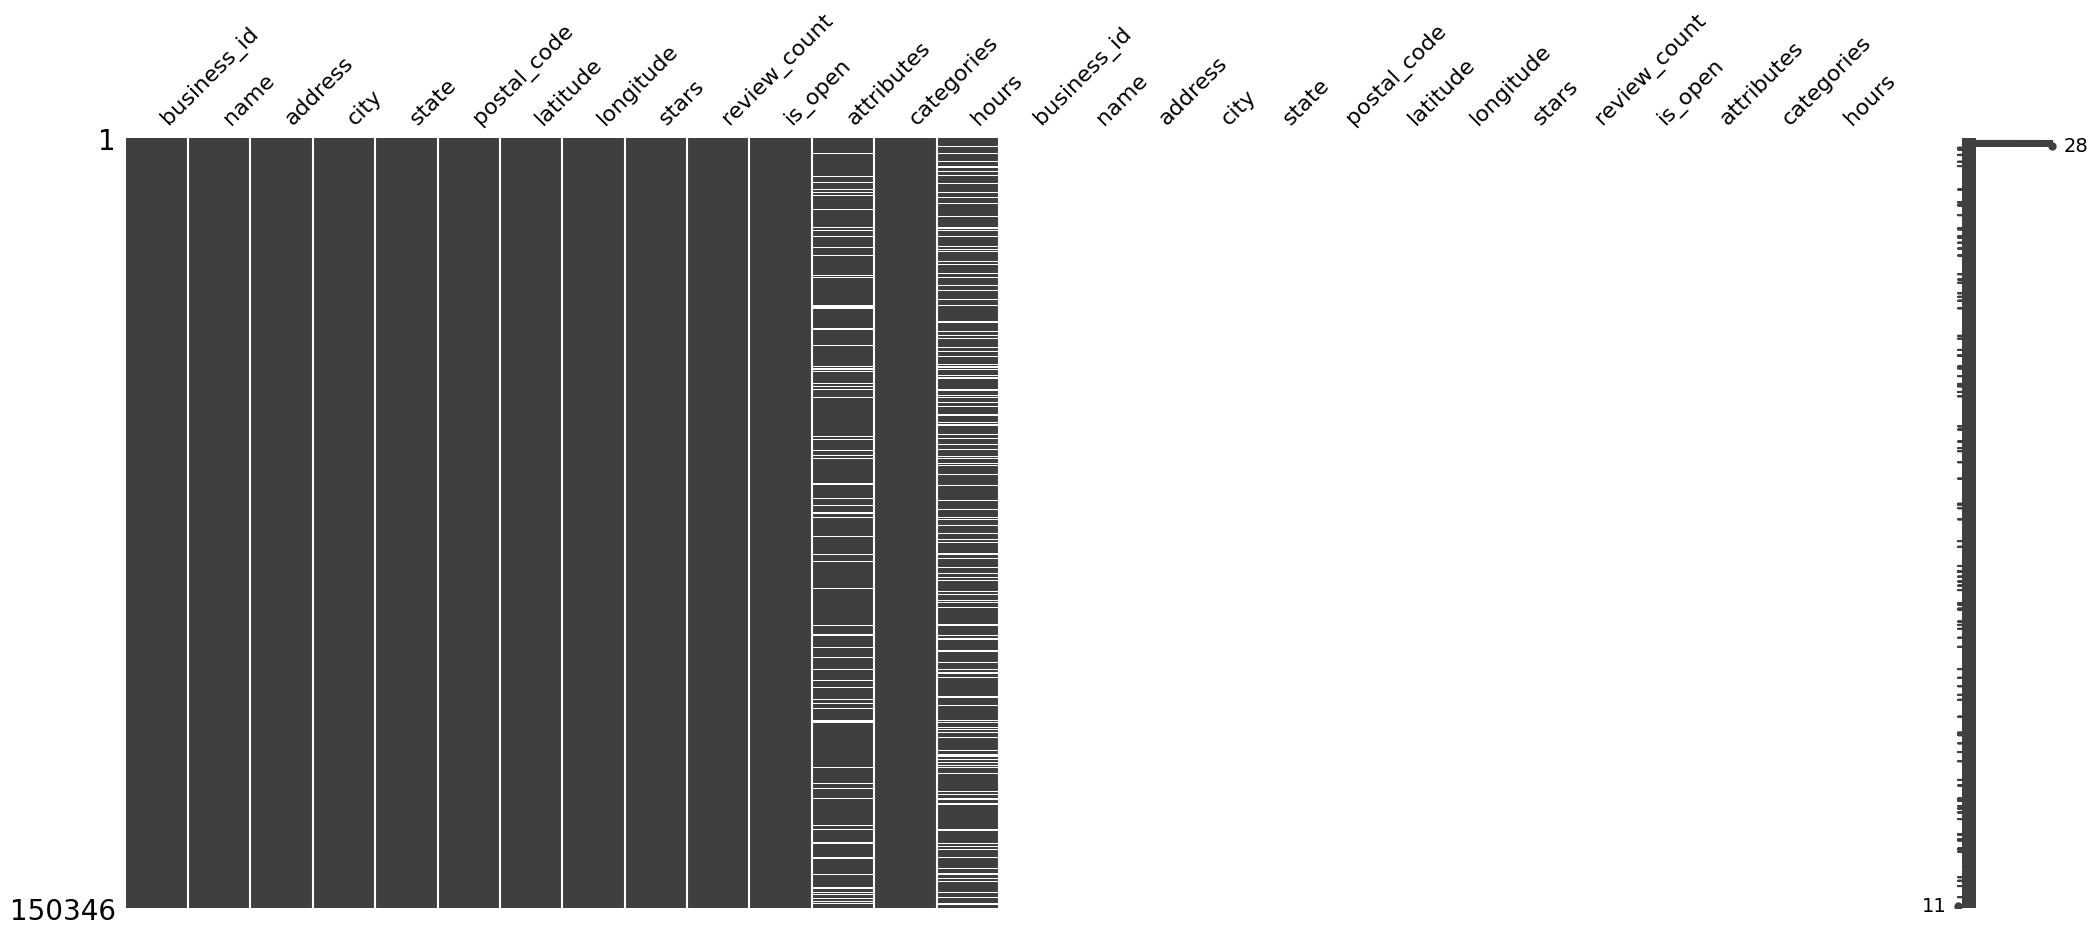

In [84]:
msno.matrix(df_business_yelp)

In [85]:
df_business_yelp.columns.values[11] = 'attributes'
df_business_yelp.columns.values[13] = 'hours'
df_business_yelp.columns.values[14] = 'b_id'
df_business_yelp.columns.values[15] = 'na'
df_business_yelp.columns.values[16] = 'ad'
df_business_yelp.columns.values[17] = 'ci'
df_business_yelp.columns.values[18] = 'sta'
df_business_yelp.columns.values[19] = 'l'
df_business_yelp.columns.values[20] = 'lo'
df_business_yelp.columns.values[21] = 'star'
df_business_yelp.columns.values[22] = 're'
df_business_yelp.columns.values[23] = 'is'
df_business_yelp.columns.values[24] = 'attr'
df_business_yelp.columns.values[25] = 'cat'
df_business_yelp.columns.values[26] = 'ho'
df_business_yelp.columns.values[27] = 'hr'

In [86]:
df_business_yelp.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,b_id,na,ad,ci,sta,l,lo,star,re,is,attr,cat,ho,hr
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
columnas_a_borrar = ['b_id','na','ad','ci','sta','l','lo','star','re','is','attr','cat','ho','hr']
df_business_yelp = df_business_yelp.drop(columnas_a_borrar, axis=1)

In [88]:
# Rellena la columna 'nombre_columna' con "sin información" donde los valores están vacíos
#se cambian la informacion que esta en blanco por la fecha por defecto 01-01-0000
df_business_yelp['state'].fillna("Sin Información", inplace=True)
df_business_yelp['attributes'].fillna("Sin Información", inplace=True)
df_business_yelp['categories'].fillna("Sin Información", inplace=True)
df_business_yelp['hours'].fillna('0:0-0:0', inplace=True)

<AxesSubplot: >

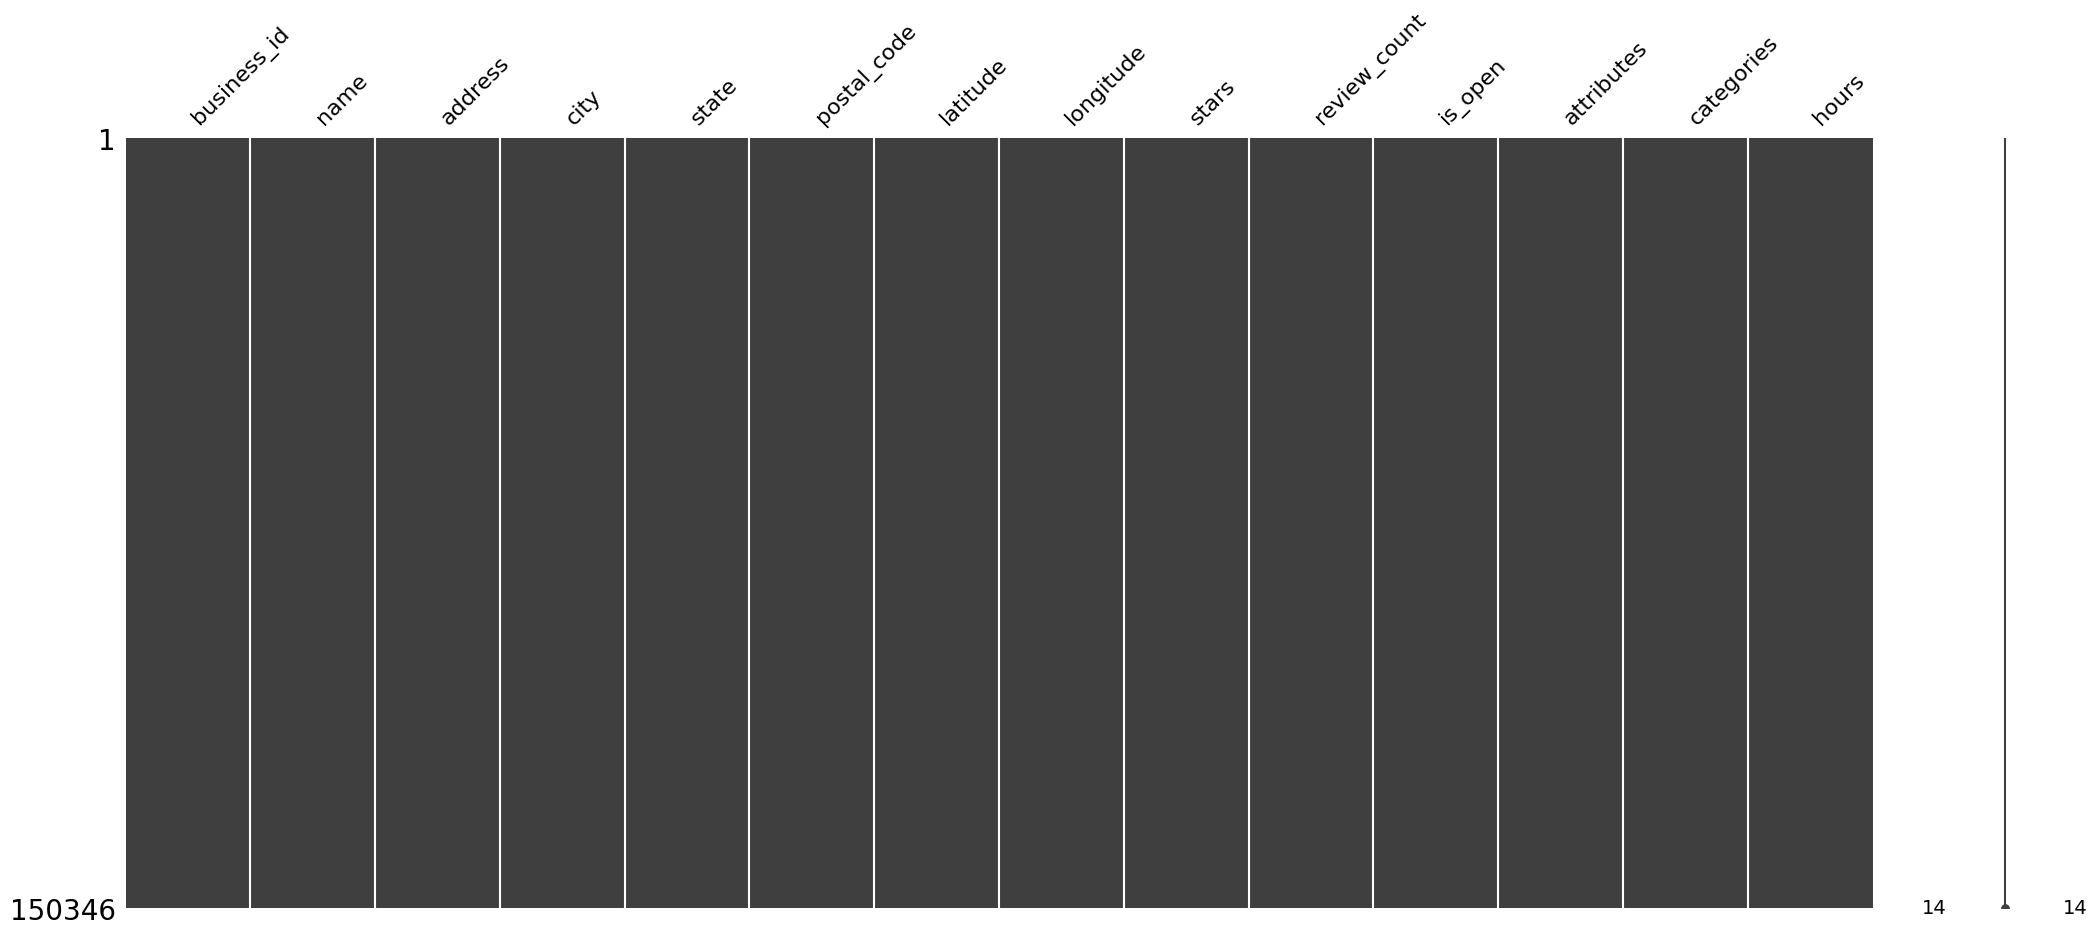

In [89]:
msno.matrix(df_business_yelp)

In [90]:
# Veo los valores nulos 
df_business_yelp.isnull().sum()

business_id     0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
stars           0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

Considero que estas columnas solo tiene valores vacios, con lo cual debemos eliminarlas, ya que estan duplicadas sin valores:
business_id, name, address, city, state, postal_code, latitude, longitude, stars, review_count, is_open, attributes, categories, hours 

Probe el metodo de drop pero elimina la columna que tiene valores y la que no con lo cual debemos generar una funcion que vaya todomando las columnas que tienen datos y crear un df nuevo.

In [91]:
df_business_yelp.head(2)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,Sin Información,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",0:0-0:0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,Sin Información,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."


In [153]:
df_business_copy = df_business_yelp.copy()

In [154]:
desanidar_attributes = []

for _, row in df_business_copy.iterrows():
    business_id = row['business_id']  # Obtener el valor de 'business_id'
    attributes = row['attributes']

    if pd.notna(attributes) and isinstance(attributes, dict):
        for attribute, value in attributes.items():
            # Agregar 'business_id' a cada fila
            desanidar_attributes.append([business_id, attribute, value])

# Crear un nuevo DataFrame con los datos desanidados
df_desa_attributes = pd.DataFrame(desanidar_attributes, columns=['business_id', 'attribute', 'condition'])


In [155]:
df_desa_attributes.head(10)

,business_id,attribute,condition
0,Pns2l4eNsfO8kk83dixA6A,ByAppointmentOnly,True
1,mpf3x-BjTdTEA3yCZrAYPw,BusinessAcceptsCreditCards,True
2,tUFrWirKiKi_TAnsVWINQQ,BikeParking,True
3,tUFrWirKiKi_TAnsVWINQQ,BusinessAcceptsCreditCards,True
4,tUFrWirKiKi_TAnsVWINQQ,RestaurantsPriceRange2,2
5,tUFrWirKiKi_TAnsVWINQQ,CoatCheck,False
6,tUFrWirKiKi_TAnsVWINQQ,RestaurantsTakeOut,False
7,tUFrWirKiKi_TAnsVWINQQ,RestaurantsDelivery,False
8,tUFrWirKiKi_TAnsVWINQQ,Caters,False
9,tUFrWirKiKi_TAnsVWINQQ,WiFi,u'no'


In [165]:
# Crear una lista para almacenar los datos desanidados
desanidar_hours = []

# Iterar sobre cada fila del DataFrame
for _, row in df_business_copy.iterrows():
    hours_data = row['hours']
    if pd.notna(hours_data):
        # Obtener el 'business_id' correspondiente
        business_id = row['business_id']
        if isinstance(hours_data, dict):
            # Si 'hours_data' es un diccionario, iterar sobre las claves y valores
            for day, hours_range in hours_data.items():
                desanidar_hours.append([business_id, day, hours_range])
        else:
            # Si 'hours_data' no es un diccionario, mantenerlo como está
            desanidar_hours.append([business_id, hours_data])

# Crear un nuevo DataFrame con los datos desanidados
df_desa_hours = pd.DataFrame(desanidar_hours, columns=['business_id', 'day', 'hour'])


In [166]:
df_desa_hours.head(10)

,business_id,day,hour
0,Pns2l4eNsfO8kk83dixA6A,0:0-0:0,None
1,mpf3x-BjTdTEA3yCZrAYPw,Monday,0:0-0:0
2,mpf3x-BjTdTEA3yCZrAYPw,Tuesday,8:0-18:30
3,mpf3x-BjTdTEA3yCZrAYPw,Wednesday,8:0-18:30
4,mpf3x-BjTdTEA3yCZrAYPw,Thursday,8:0-18:30
5,mpf3x-BjTdTEA3yCZrAYPw,Friday,8:0-18:30
6,mpf3x-BjTdTEA3yCZrAYPw,Saturday,8:0-14:0
7,tUFrWirKiKi_TAnsVWINQQ,Monday,8:0-22:0
8,tUFrWirKiKi_TAnsVWINQQ,Tuesday,8:0-22:0
9,tUFrWirKiKi_TAnsVWINQQ,Wednesday,8:0-22:0


In [167]:
df_business_merged = df_desa_attributes.merge(df_desa_hours, on='business_id', how='inner')
df_business_merged = df_business_merged.merge(df_business_copy, on='business_id', how='inner')
df_business_merged = df_business_merged.drop(columns=['attributes', 'hours'])

In [168]:
df_business_merged.head()

,business_id,attribute,condition,day,hour,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,ByAppointmentOnly,True,0:0-0:0,None,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,Sin Información,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,BusinessAcceptsCreditCards,True,Monday,0:0-0:0,The UPS Store,87 Grasso Plaza Shopping Center,Affton,Sin Información,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,mpf3x-BjTdTEA3yCZrAYPw,BusinessAcceptsCreditCards,True,Tuesday,8:0-18:30,The UPS Store,87 Grasso Plaza Shopping Center,Affton,Sin Información,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
3,mpf3x-BjTdTEA3yCZrAYPw,BusinessAcceptsCreditCards,True,Wednesday,8:0-18:30,The UPS Store,87 Grasso Plaza Shopping Center,Affton,Sin Información,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
4,mpf3x-BjTdTEA3yCZrAYPw,BusinessAcceptsCreditCards,True,Thursday,8:0-18:30,The UPS Store,87 Grasso Plaza Shopping Center,Affton,Sin Información,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."


In [169]:
df_business_merged.shape

(7094185, 16)

In [170]:
# Exporto df desanidado
df_business_merged.to_parquet('Archivos/df_business_yelp.parquet')

### Carga y etl tip de Yelp 

In [6]:
df_tip_yelp.head(2)

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0


In [7]:
df_tip_yelp.shape

(908915, 5)

In [8]:
df_tip_yelp.isnull().sum()

user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64

In [9]:
df_tip_yelp.duplicated().sum()

67

In [10]:
df_tip_yelp.columns.values[0] = 'user_id'
df_tip_yelp.columns.values[1] = 'business_id'
df_tip_yelp.columns.values[2] = 'text'
df_tip_yelp.columns.values[3] = 'date'
df_tip_yelp.columns.values[4] = 'compliment_count'

In [11]:
duplicate_counts = df_tip_yelp.value_counts()

In [12]:
duplicate_counts.head(2)

user_id                 business_id             text                                                                                                                                                                                                                                                                                                                                                 date                 compliment_count
1gDoko0TrN0lnQlMC2JtXw  06PmqoU3uY5Vb-BEaMPVfw  We ordered a pizza on New Year's Day, it never came. We called a few times and was told it was on the way. After 2.5 hours we told them to forget it! I don't want a anything that's been driving around for an hour and a half!! \nThought tonight we would try again! The pizza did show up RAW!! It's baking in MY oven now!! Very frustrating!!  2014-02-20 04:09:37  0                   6
KDR-RHW_h4gap0A7jU2wHQ  WltG6PWu0zRTTUpWne3W8w  This restaurant has been here since I've been a child. They have the best Shrimp rolls. The b

In [20]:
df_tip_yelp = df_tip_yelp[df_tip_yelp.duplicated(keep=False)]
duplicate_counts = df_tip_yelp['user_id'].value_counts()
duplicate_counts.head()

Series([], Name: user_id, dtype: int64)

In [22]:
# miramos los duplicados y corroboramos cuales son , se procede a eliminar
duplicates = df_tip_yelp[df_tip_yelp['user_id']]
duplicates.head(6)

""


In [15]:
# Eliminar duplicados basados en todas las columnas del DataFrame
df_tip_yelp.drop_duplicates(subset='user_id', inplace=True)


In [24]:
duplicates.head(2)

""


In [138]:
df_tip_yelp_sin_duplicados.duplicated().sum()

0

In [139]:
df_tip_yelp_sin_duplicados.shape

(59, 5)

In [140]:
# Exporto df desanidado
df_tip_yelp_sin_duplicados.to_parquet('Archivos/df_tip_yelp.parquet')